In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load files

In [2]:
drug_info = pd.read_csv('../../processed_data/l1000_sdst_drugs_info_8432.csv', index_col=0)
drug_info.head()

,cmap_name,target,moa,canonical_smiles,inchi_key,compound_aliases,standard_smiles,drug_node_idx
pert_id,,,,,,,,
BRD-A08715367,L-theanine,NaN,NaN,CCNC(=O)CCC(N)C(O)=O,DATAGRPVKZEWHA-UHFFFAOYSA-N,l-theanine,CCNC(=O)CCC(N)C(=O)O,2094
BRD-A12237696,L-citrulline,NaN,NaN,NC(CCCNC(N)=O)C(O)=O,RHGKLRLOHDJJDR-UHFFFAOYSA-N,l-citrulline,NC(=O)NCCCC(N)C(=O)O,6962
BRD-A18795974,BRD-A18795974,NaN,NaN,CCCN(CCC)C1CCc2ccc(O)cc2C1,BLYMJBIZMIGWFK-UHFFFAOYSA-N,7-hydroxy-DPAT,CCCN(CCC)C1CCc2ccc(O)cc2C1,1834
BRD-A27924917,BRD-A27924917,NaN,NaN,NCC(O)(CS(O)(=O)=O)c1ccc(Cl)cc1,WBSMZVIMANOCNX-UHFFFAOYSA-N,2-hydroxysaclofen,NCC(O)(CS(=O)(=O)O)c1ccc(Cl)cc1,7054
BRD-A39230911,chlorphensin,NaN,NaN,NC(=O)OCC(O)COc1ccc(Cl)cc1,SKPLBLUECSEIFO-UHFFFAOYSA-N,chlorphenesin-carbamate,NC(=O)OCC(O)COc1ccc(Cl)cc1,6972


## Filter MOA types with the highest sample size

In [3]:
drug_info_filter = drug_info.dropna(subset=['target','moa'])
drug_info_filter.drop_duplicates(subset='drug_node_idx', keep='first', inplace=True)
drug_moa_statics = dict(drug_info_filter.moa.value_counts())
drug_moa_statics_df = pd.DataFrame.from_dict(drug_moa_statics, orient='index')
drug_moa_statics_top = {k:v for k,v in drug_moa_statics.items() if v>34}
drug_info_filter_top = drug_info_filter[drug_info_filter.moa.isin(drug_moa_statics_top.keys())]
drug_id2moa_top = {k:v for k,v in zip(drug_info_filter_top.drug_node_idx, drug_info_filter_top.moa)}
drug_id2moa_top

/tmp/ipykernel_79941/861264857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_info_filter.drop_duplicates(subset='drug_node_idx', keep='first', inplace=True)


{4560: 'Topoisomerase inhibitor',
 3160: 'Topoisomerase inhibitor',
 555: 'Cyclooxygenase inhibitor',
 8073: 'Cyclooxygenase inhibitor',
 4616: 'Dopamine receptor agonist',
 3899: 'Dopamine receptor agonist',
 1937: 'Estrogen receptor agonist',
 4371: 'Serotonin receptor agonist',
 6575: 'Serotonin receptor agonist',
 2963: 'Serotonin receptor agonist',
 3718: 'Serotonin receptor agonist',
 6722: 'Serotonin receptor agonist',
 2761: 'Adrenergic receptor agonist',
 6568: 'Phosphodiesterase inhibitor',
 5860: 'Glutamate receptor antagonist',
 2128: 'Glutamate receptor antagonist',
 6374: 'Glutamate receptor antagonist',
 6206: 'Glutamate receptor antagonist',
 1001: 'Serotonin receptor antagonist',
 673: 'Adrenergic receptor antagonist',
 5737: 'Acetylcholine receptor antagonist',
 63: 'Calcium channel blocker',
 2142: 'Calcium channel blocker',
 3264: 'Calcium channel blocker',
 3847: 'Calcium channel blocker',
 3488: 'Calcium channel blocker',
 64: 'Calcium channel blocker',
 1564: 'Ca

## generate plot df

In [4]:
colors_15 = [
    "#c6dbef", "#a2c8ec", "#6baed6", 
    "#fdd0a2", "#fdab9f", "#f7b6d2",
    "#cedb9c", "#bebf38", "#bfa242", 
    "#bcbddc", "#9c9ede", "#756bb1",  
    "#fad46b", "#fdae6b", "#ff7f0e",
]

In [5]:
drug_embeddings = np.load('../../HG_data/saved_embedding/HG_drug_embeddings.npy', allow_pickle=True)
drug_embeddings.shape

(8981, 256)

In [6]:
drug_df = pd.DataFrame(data=range(drug_embeddings.shape[0]), columns=['drug_node_idx'])
drug_df['moa_top']= drug_df.drug_node_idx.map(drug_id2moa_top).fillna('others')
drug_node_idx2moa_top = dict(zip(drug_df.drug_node_idx, drug_df.moa_top))

drug_df

,drug_node_idx,moa_top
0,0,others
1,1,others
2,2,Adrenergic receptor agonist
3,3,others
4,4,others
...,...,...
8976,8976,others
8977,8977,others
8978,8978,others
8979,8979,others


# UMAP PLot: HG embedding

/root/data1/GY/Mambaforge/envs/openbiomed/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/data1/GY/Mambaforge/envs/openbiomed/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


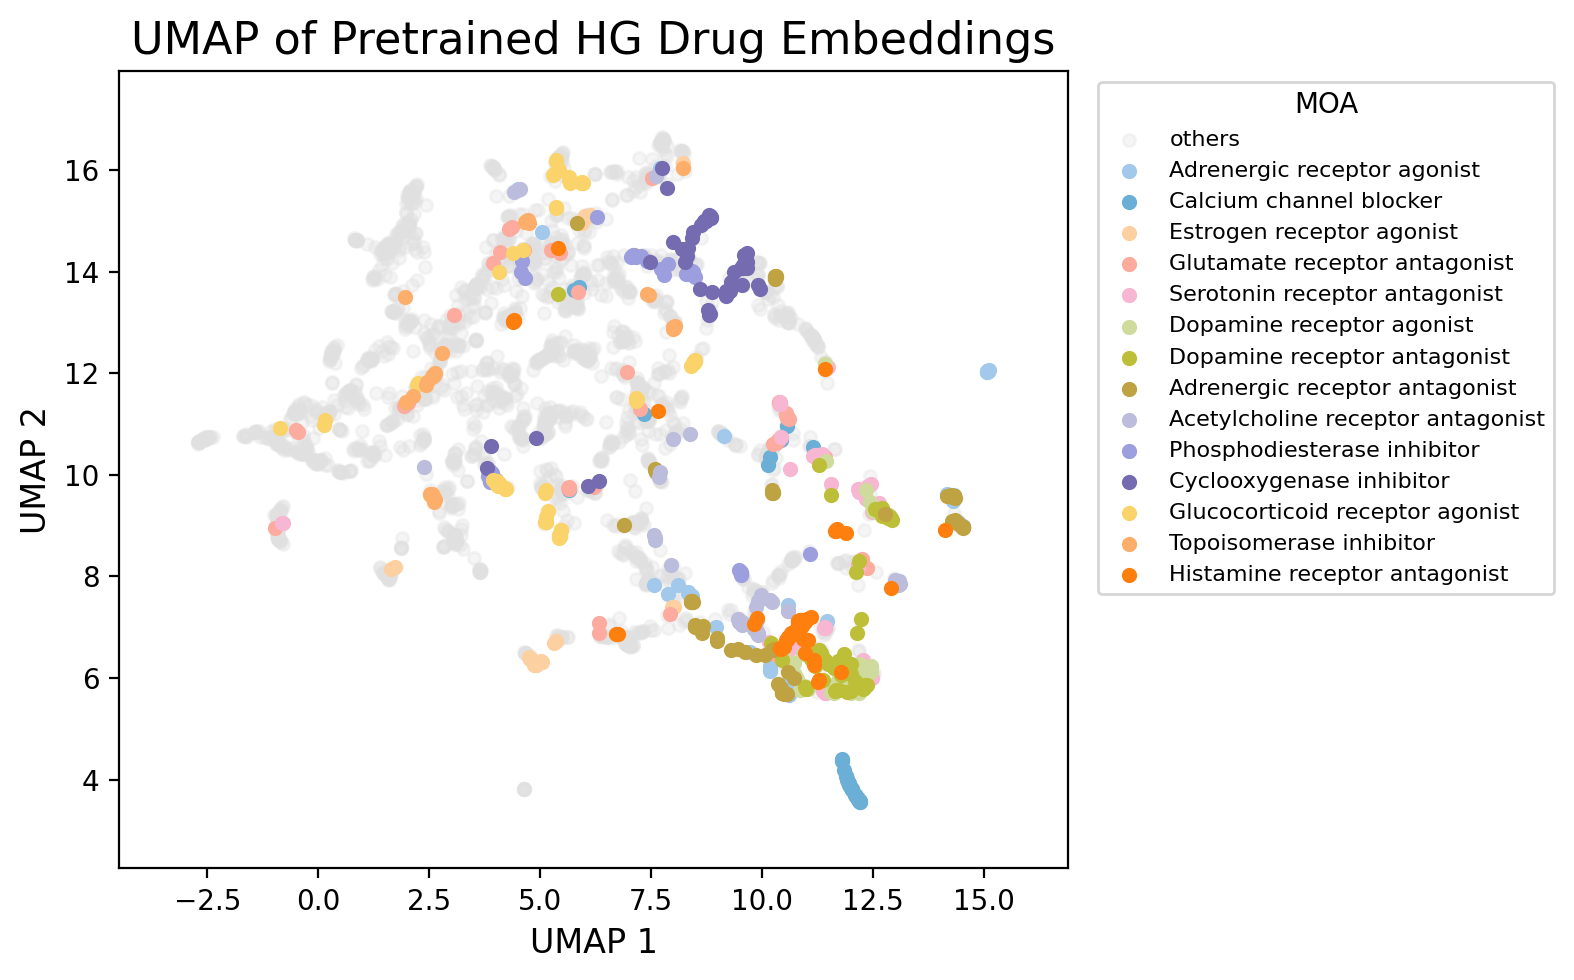

In [7]:
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


node_embed = np.array(drug_embeddings[drug_info_filter.drug_node_idx, :])
labels = [drug_node_idx2moa_top[k] for k in drug_info_filter.drug_node_idx]
seed = 2424
np.random.seed(seed)

pca = PCA(n_components=60, random_state=seed)
pca_embedding = pca.fit_transform(node_embed)

reducer = umap.UMAP(random_state=seed)
umap_embedding = reducer.fit_transform(pca_embedding)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
unique_labels = drug_df.moa_top.unique()
colors = colors_15


fig = plt.figure(figsize=(8, 5), dpi=200)

for label, color in zip(unique_labels, colors):
    indices = encoded_labels == label_encoder.transform([label])[0]
    if label == 'others': 
        plt.scatter(
            umap_embedding[indices, 0],
            umap_embedding[indices, 1],
            label=label,
            color='#E0E0E0',
            alpha=0.3,
            # edgecolors='w',
            # linewidths=0.5,
            s=20
        )
    else:
        plt.scatter(
            umap_embedding[indices, 0],
            umap_embedding[indices, 1],
            label=label,
            color=color,
            alpha=1,
            # edgecolors='w',
            # linewidths=0.5,
            s=20
        )

x_min, x_max = umap_embedding[:, 0].min(), umap_embedding[:, 0].max()
y_min, y_max = umap_embedding[:, 1].min(), umap_embedding[:, 1].max()
margin_ratio = 0.1
x_margin = (x_max - x_min) * margin_ratio
y_margin = (y_max - y_min) * margin_ratio
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)
    
    
plt.title("UMAP of Pretrained HG Drug Embeddings", fontsize=16)
plt.xlabel("UMAP 1", fontsize=12)
plt.ylabel("UMAP 2", fontsize=12)


plt.legend(title="MOA", bbox_to_anchor=(1.02, 1), fontsize=8)
# plt.legend(title="MOA", loc='right')
# plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# fig.savefig('figs/HG_drug_embed.svg',format='svg',dpi=300, bbox_inches='tight')

# UMAP PLot: UniMol embeddings

In [8]:
unimol_embeddings = np.load('../../HG_data/all_drug_node_feat_8981.npy', allow_pickle=True)
unimol_embeddings

array([[ 0.31514993, -1.01541269, -0.65394235, ...,  2.40858245,
         0.27483371, -2.11691499],
       [ 0.05647923, -0.77065212, -0.46953246, ...,  2.13590336,
         0.86327273, -2.11541796],
       [ 0.09305923, -0.82985938, -0.73271251, ...,  2.07623172,
         0.69270569, -2.06390071],
       ...,
       [-0.31266671, -0.47372425, -0.26074362, ...,  2.22505474,
         0.44823417, -2.16184926],
       [ 0.03104709, -1.02895021, -0.52115977, ...,  2.17065382,
         0.56803554, -2.17474031],
       [-0.237161  , -0.58497274,  0.03901221, ...,  2.20728159,
         0.69227856, -2.0807693 ]])

/root/data1/GY/Mambaforge/envs/openbiomed/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


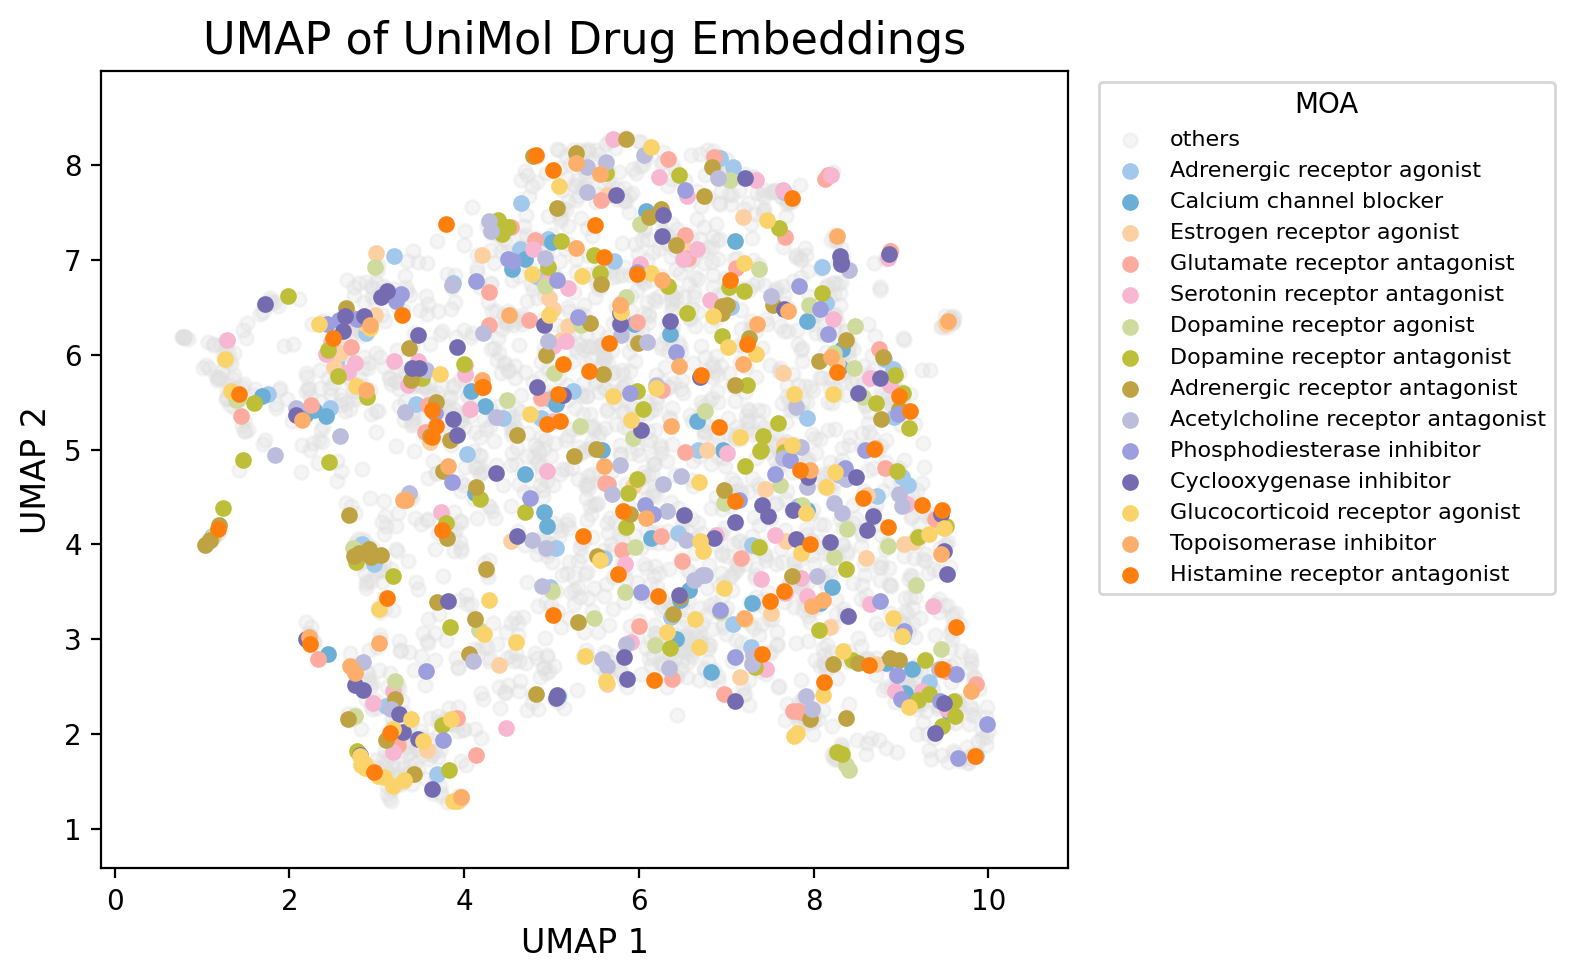

In [9]:
node_embed = unimol_embeddings[drug_info_filter.drug_node_idx, :]

pca = PCA(n_components=50, random_state=seed)
pca_embedding = pca.fit_transform(node_embed)

reducer = umap.UMAP(random_state=42)
umap_embedding = reducer.fit_transform(pca_embedding)

fig = plt.figure(figsize=(8, 5), dpi=200)
for label, color in zip(unique_labels, colors):
    indices = encoded_labels == label_encoder.transform([label])[0]
    if label == 'others':
        plt.scatter(
            umap_embedding[indices, 0],
            umap_embedding[indices, 1],
            label=label,
            color='#E0E0E0',
            alpha=0.3,
            # edgecolors='w',
            # linewidths=0.5,
            s=25
        )
    else:
        plt.scatter(
            umap_embedding[indices, 0],
            umap_embedding[indices, 1],
            label=label,
            color=color,
            alpha=1,
            # edgecolors='w',
            # linewidths=0.5,
            s=25
        )

x_min, x_max = umap_embedding[:, 0].min(), umap_embedding[:, 0].max()
y_min, y_max = umap_embedding[:, 1].min(), umap_embedding[:, 1].max()
margin_ratio = 0.1
x_margin = (x_max - x_min) * margin_ratio
y_margin = (y_max - y_min) * margin_ratio
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)
    
    
plt.title("UMAP of UniMol Drug Embeddings", fontsize=16)
plt.xlabel("UMAP 1", fontsize=12)
plt.ylabel("UMAP 2", fontsize=12)


plt.legend(title="MOA", bbox_to_anchor=(1.02, 1), fontsize=8)
# plt.legend(title="MOA", loc='right')
# plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# fig.savefig('figs/Unimol_drug_embed.svg',format='svg',dpi=300, bbox_inches='tight')